In [ ]:
!pip install qiskit qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.1 MB/s eta 0:00:00

--- BV run: s=101, b=0 (measure inputs only) ---


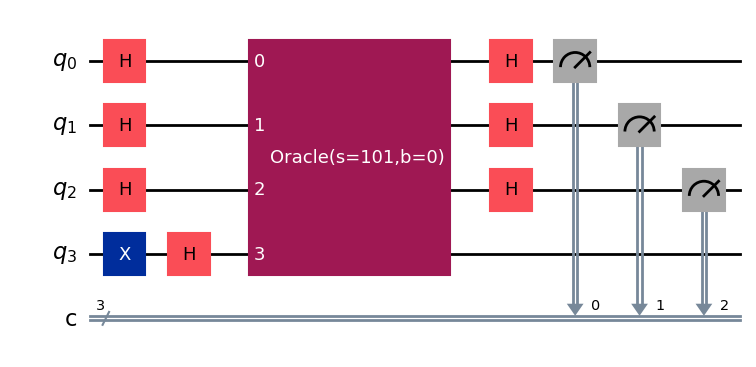

counts: {'100': 111, '101': 107, '111': 130, '011': 130, '001': 109, '110': 147, '010': 130, '000': 3232}


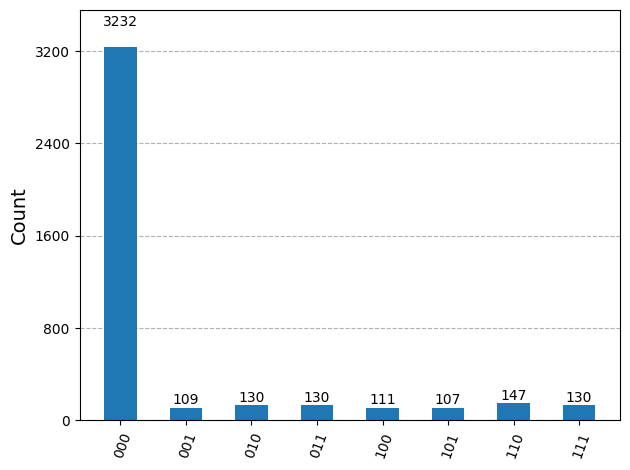


--- BV run: s=101, b=1 (measure inputs only) ---


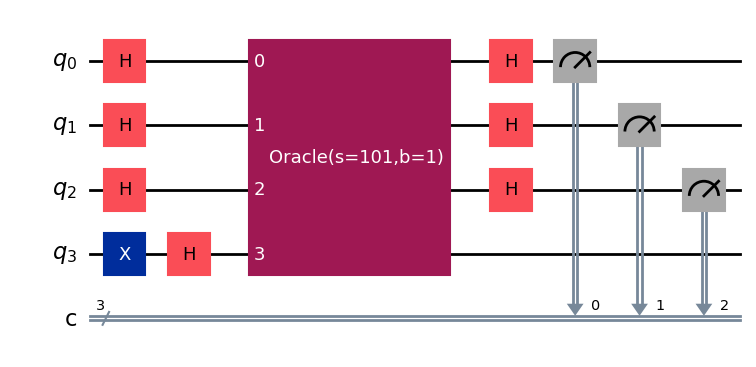

counts: {'110': 121, '001': 119, '101': 114, '011': 131, '111': 127, '100': 128, '010': 138, '000': 3218}


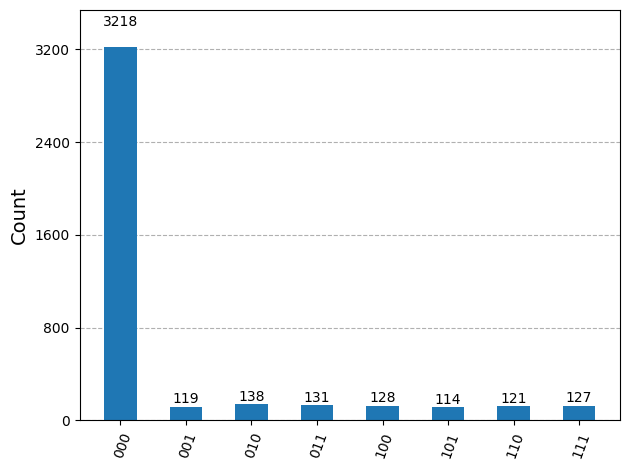


--- BV run: s=0110, b=0 (measure inputs only) ---


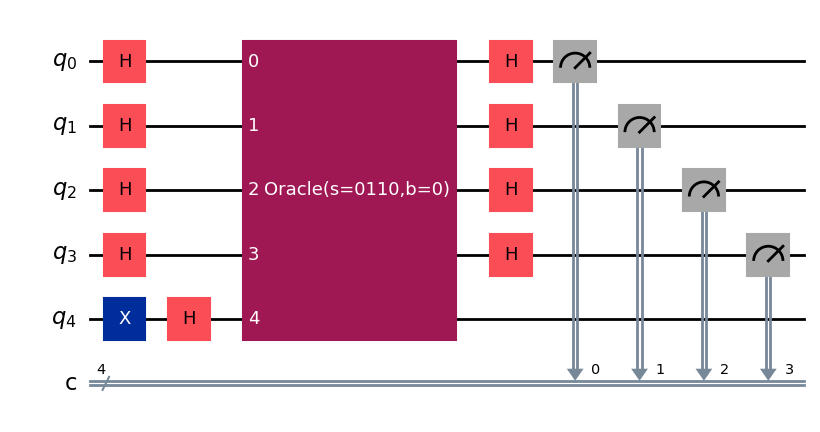

counts: {'0001': 30, '1100': 19, '0000': 3617, '0010': 44, '1111': 35, '1101': 37, '1000': 24, '0110': 29, '1011': 33, '0011': 23, '0111': 30, '1110': 29, '1001': 34, '0101': 36, '0100': 35, '1010': 41}


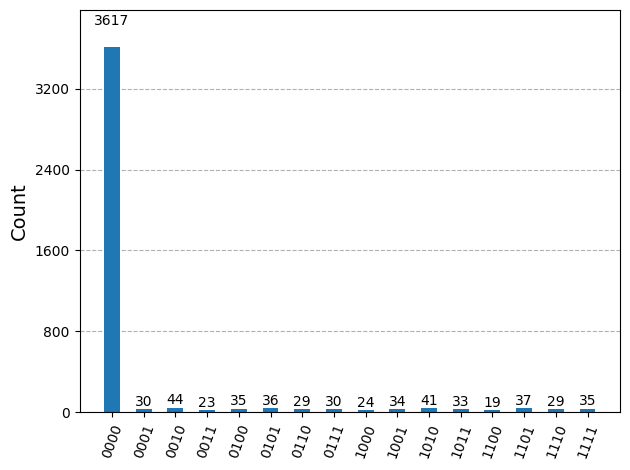


--- BV run: s=0110, b=1 (measure inputs only) ---


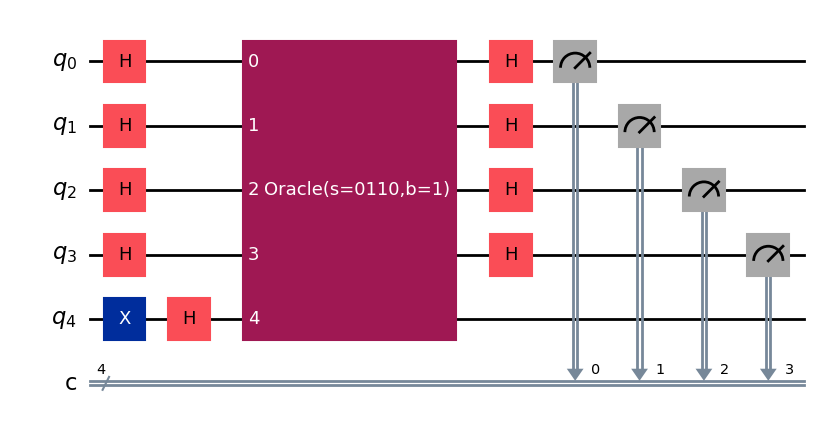

counts: {'1011': 31, '1010': 33, '0000': 3621, '0010': 35, '1000': 35, '0110': 31, '1101': 30, '1110': 27, '0101': 33, '1001': 33, '1100': 27, '1111': 26, '0001': 36, '0111': 32, '0011': 36, '0100': 30}


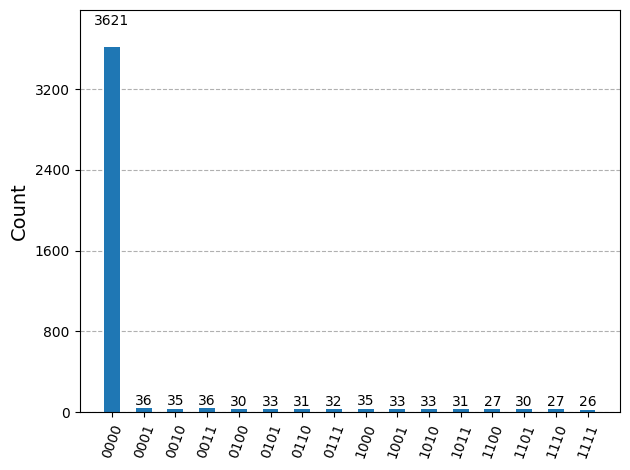


--- BV with ancilla measurement: s=101, b=0 ---


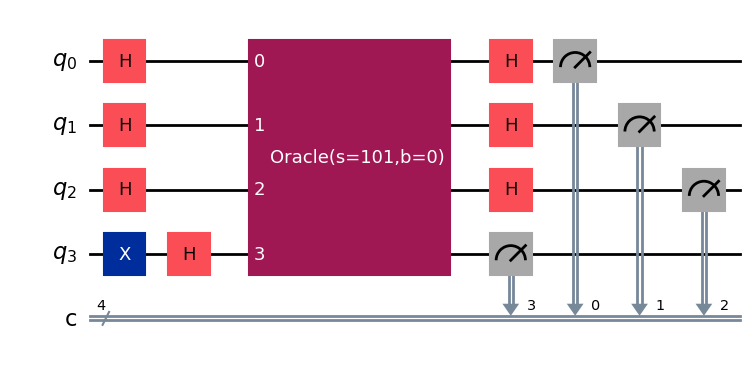

counts (inputs+ancilla): {'1101': 122, '1111': 130, '1011': 130, '1110': 140, '1010': 150, '0000': 2009, '1100': 120, '1001': 123, '1000': 1172}


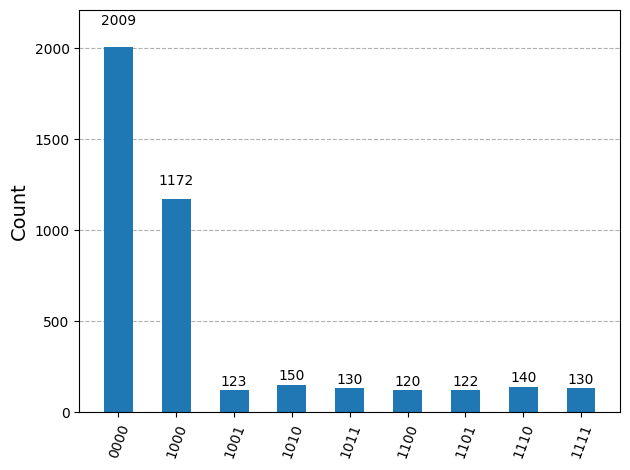


--- BV with ancilla measurement: s=101, b=1 ---


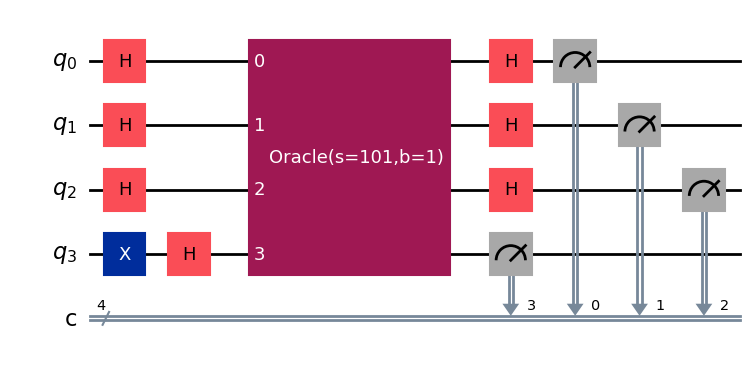

counts (inputs+ancilla): {'0110': 137, '0001': 116, '0101': 130, '0111': 123, '0011': 138, '0100': 134, '0010': 132, '0000': 1168, '1000': 2018}


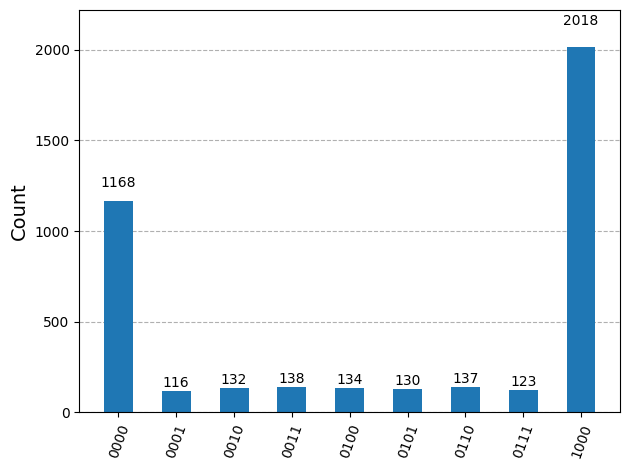


--- Ideal vs Noisy comparison for s=101 ---
ideal counts: {'100': 119, '110': 126, '001': 136, '101': 125, '010': 121, '000': 3186, '111': 144, '011': 139}
noisy counts: {'101': 114, '100': 225, '001': 183, '110': 138, '011': 130, '111': 114, '010': 191, '000': 3001}


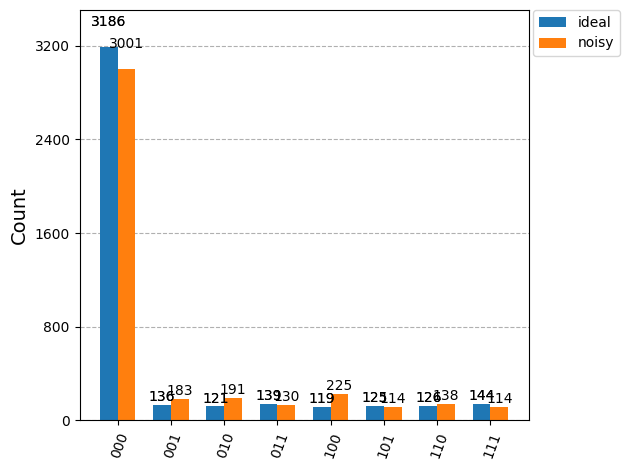

In [2]:
# (Optional) install once in notebook if needed:
!pip install qiskit qiskit-aer qiskit-ibm-runtime pylatexenc --quiet

# ------------------ Bernstein–Vazirani: single copy-pasteable code cell ------------------
import math
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, ReadoutError
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# safe draw helper (mpl or text)
def safe_draw(qc):
    try:
        display(qc.draw('mpl'))
    except Exception:
        print(qc.draw('text'))

# Oracle gate for f(x) = s·x ⊕ b (s: MSB..LSB string, b: 0/1)
def bv_oracle_gate(s: str, b: int = 0):
    n = len(s)
    qc = QuantumCircuit(n + 1)
    anc = n
    # flip inputs where s bit is '0' so control for MCX becomes 1
    for i, bit in enumerate(reversed(s)):
        if bit == '0':
            qc.x(i)
    # multi-controlled X using ancilla as target (last qubit)
    qc.h(anc)
    qc.mcx(list(range(n)), anc)  # controls: all input qubits -> target anc
    qc.h(anc)
    # undo flips
    for i, bit in enumerate(reversed(s)):
        if bit == '0':
            qc.x(i)
    # apply constant b as X on ancilla (this flips ancilla output; affects ancilla only)
    if b == 1:
        qc.x(anc)
    return qc.to_gate(label=f"Oracle(s={s},b={b})")

# Full Bernstein-Vazirani circuit: returns QuantumCircuit measuring input qubits
def bernstein_vazirani_circuit(s: str, b: int = 0, measure_ancilla=False):
    n = len(s)
    qc = QuantumCircuit(n + 1, n + (1 if measure_ancilla else 0))
    anc = n
    # prepare ancilla in |1> then H -> |->, input in superposition
    qc.x(anc)
    qc.h(anc)
    qc.h(range(n))
    # apply oracle
    oracle = bv_oracle_gate(s, b)
    qc.append(oracle, range(n + 1))
    # Hadamard on inputs to decode s
    qc.h(range(n))
    # measure inputs; optionally measure ancilla to observe effect of b
    if measure_ancilla:
        qc.measure(range(n + 1), range(n + 1))
    else:
        qc.measure(range(n), range(n))
    qc.name = f"BV(s={s},b={b})"
    return qc

# Run circuit on AerSimulator (transpile first). If noise_model provided, simulate noisy run.
def run_on_simulator(qc, noise_model=None, shots=4096):
    sim = AerSimulator()
    tcirc = transpile(qc, sim)
    if noise_model is None:
        job = sim.run(tcirc, shots=shots)
    else:
        job = sim.run(tcirc, noise_model=noise_model, shots=shots)
    result = job.result()
    return result.get_counts()

# Simple noise model maker
def make_noise_model(p1=0.005, p2=0.02, readout_error=0.02):
    nm = NoiseModel()
    nm.add_all_qubit_quantum_error(depolarizing_error(p1, 1), ['h','x'])
    nm.add_all_qubit_quantum_error(depolarizing_error(p2, 2), ['cx','cx_1'])  # common two-qubit names
    ro = [[1-readout_error, readout_error],[readout_error, 1-readout_error]]
    nm.add_all_qubit_readout_error(ReadoutError(ro))
    return nm

# ------------------ Examples / Experiments ------------------

# 1) Change secret string s and verify measured output matches s (b ignored for inputs)
examples = [("101", 0), ("101", 1), ("0110", 0), ("0110", 1)]
for s, b in examples:
    qc = bernstein_vazirani_circuit(s, b, measure_ancilla=False)
    print(f"\n--- BV run: s={s}, b={b} (measure inputs only) ---")
    safe_draw(qc)
    counts = run_on_simulator(qc, noise_model=None, shots=4096)
    print("counts:", counts)
    display(plot_histogram(counts))
    plt.show()

# 2) Demonstrate b affects ancilla only (measure ancilla too)
s = "101"
for b in (0,1):
    qc = bernstein_vazirani_circuit(s, b, measure_ancilla=True)
    print(f"\n--- BV with ancilla measurement: s={s}, b={b} ---")
    safe_draw(qc)
    counts = run_on_simulator(qc, noise_model=None, shots=4096)
    print("counts (inputs+ancilla):", counts)
    display(plot_histogram(counts))
    plt.show()

# 3) Add noise and analyze robustness
noise = make_noise_model(p1=0.01, p2=0.03, readout_error=0.02)
s = "101"
qc = bernstein_vazirani_circuit(s, b=0, measure_ancilla=False)
print("\n--- Ideal vs Noisy comparison for s=101 ---")
counts_ideal = run_on_simulator(qc, noise_model=None, shots=4096)
counts_noisy = run_on_simulator(qc, noise_model=noise, shots=4096)
print("ideal counts:", counts_ideal)
print("noisy counts:", counts_noisy)
display(plot_histogram([counts_ideal, counts_noisy], legend=['ideal','noisy']))
plt.show()


